# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [11]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install pip --upgrade
!pip install smdebug
!pip install sagemaker


     |████████████████████████████████| 1.7 MB 23.8 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1
    Uninstalling pip-21.1:
      Successfully uninstalled pip-21.1
distutils: /opt/conda/include/python3.6m/UNKNOWN
sysconfig: /opt/conda/include/python3.6m
user = False
home = None
root = None
prefix = None


In [12]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import os
import boto3
import sagemaker
import json
import zipfile

import pandas as pd
import numpy as np

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [2]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data

# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

# !unzip dogImages.zip

--2023-01-17 09:12:59--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.194.56
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.194.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  26.8MB/s    in 33s     

2023-01-17 09:13:33 (32.3 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

In [3]:
import boto3
import os
import shutil
import zipfile

s3 = boto3.client('s3')

# Set the name of the S3 bucket and the directory you want to upload
bucket_name = 'aws-dog-bucket'

# Upload the zip file to S3
# s3.upload_file('dogImages.zip', bucket_name, 'dogImages.zip')

# Cleanup
# os.remove('dogImages.zip')



In [ ]:


# Set the name of the S3 bucket, the key of the zip file, and the prefix for the unzipped files
zip_key = 'dogImages.zip'
unzip_prefix = 'data'

# Download the zip file from S3
# s3.download_file(bucket_name, zip_key, 'dogImages.zip')

# Unzip the file
# with zipfile.ZipFile('dogImages.zip', 'r') as zip_ref:
    # zip_ref.extractall('dogImages')

# Upload the unzipped files to S3
# for root, dirs, files in os.walk('dogImages'):
    # for filename in files:
    #     local_path = os.path.join(root, filename)
    #     s3_path = unzip_prefix + os.path.relpath(local_path, 'dogImages')
    #     s3.upload_file(local_path, bucket_name, s3_path)

# Cleanup
# os.remove('dogImages.zip')
# shutil.rmtree('dogImages')


In [5]:
dog_classes = [name.split('.') for name in os.listdir("dogImages/train")]
dog_classes = dict(dog_classes)
print(len(dog_classes))
dog_classes

133


{'114': 'Otterhound',
 '110': 'Norwegian_lundehund',
 '127': 'Silky_terrier',
 '091': 'Japanese_chin',
 '095': 'Kuvasz',
 '061': 'English_cocker_spaniel',
 '043': 'Canaan_dog',
 '131': 'Wirehaired_pointing_griffon',
 '124': 'Poodle',
 '087': 'Irish_terrier',
 '053': 'Cocker_spaniel',
 '064': 'English_toy_spaniel',
 '105': 'Neapolitan_mastiff',
 '032': 'Boston_terrier',
 '017': 'Bearded_collie',
 '094': 'Komondor',
 '003': 'Airedale_terrier',
 '084': 'Icelandic_sheepdog',
 '122': 'Pointer',
 '098': 'Leonberger',
 '125': 'Portuguese_water_dog',
 '009': 'American_water_spaniel',
 '058': 'Dandie_dinmont_terrier',
 '115': 'Papillon',
 '006': 'American_eskimo_dog',
 '041': 'Bullmastiff',
 '085': 'Irish_red_and_white_setter',
 '081': 'Greyhound',
 '004': 'Akita',
 '103': 'Mastiff',
 '044': 'Cane_corso',
 '118': 'Pembroke_welsh_corgi',
 '013': 'Australian_terrier',
 '117': 'Pekingese',
 '002': 'Afghan_hound',
 '025': 'Black_and_tan_coonhound',
 '129': 'Tibetan_mastiff',
 '093': 'Kerry_blue_ter

## Preprocessing and Loading the Data

The data is stored in a 3-level directory. The first level splits the data into 3 folders which contain the train, test, and validation images. Each of these folder are split into dog breeds which contain several images of the same breed.

In this case, the folder names will need to be extracted to have a list of classes to be used for the training. The label for each image can be defined by its location and filename. 

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [10]:
import pandas as pd
import numpy as np

import sagemaker
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.tuner import (
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
from sagemaker.debugger import (
    Rule,
    ProfilerRule,
    rule_configs,
    DebuggerHookConfig,
    ProfilerConfig,
    FrameworkProfile,
    CollectionConfig
)

In [8]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
        "lr" : ContinuousParameter(0.001,0.1),
        "batch-size" : CategoricalParameter([32,64,128])
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [ ]:
import hpo

#TODO: Create estimators for your HPs

# TODO: Your estimator here

estimator = PyTorch(
    entry_point="hpo.py", 
    role=get_execution_role(),
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)


# TODO: Your HP tuner here
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=9,
    max_parallel_jobs=3,
    objective_type=objective_type,
)


In [ ]:
# TODO: Fit your HP Tuner
# TODO: Remember to include your data channels

bucket_name = 'aws-dog-bucket'
prefix = 'datadogImages'

tuner.fit({"training" : "s3://{}/{}".format(bucket_name, prefix) + "/train", 
        "testing": "s3://{}/{}".format(bucket_name, prefix) + "/test",
        "validation" : "s3://{}/{}".format(bucket_name, prefix) + "/valid"}) 

In [11]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()


#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2023-01-25 22:41:30 Starting - Found matching resource for reuse
2023-01-25 22:41:30 Downloading - Downloading input data
2023-01-25 22:41:30 Training - Training image download completed. Training in progress.
2023-01-25 22:41:30 Uploading - Uploading generated training model
2023-01-25 22:41:30 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"32"',
 'lr': '0.0024148958723497088',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-01-25-21-41-00-886"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-057024489761/pytorch-training-2023-01-25-21-41-00-886/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [13]:
# TODO: Set up debugging and profiling rules and hooks

hyperparameters = {"batch-size": 32, "lr": 0.0024148958723497088}

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]
collection_configs=[
    CollectionConfig(name="CrossEntropyLoss_output_0",parameters={
                "include_regex": "CrossEntropyLoss_output_0", 
                "train.save_interval": "100","eval.save_interval": "10"})
]

profiler_config = ProfilerConfig(system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10))
debug_config = DebuggerHookConfig(collection_configs=collection_configs)


In [ ]:
# TODO: Create and fit an estimator

bucket_name = 'aws-dog-bucket'
prefix = 'datadogImages'

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="smdebugger-dogImages-pytorch",
    role=get_execution_role(),
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    rules=rules,
    debugger_hook_config=debug_config,
    profiler_config=profiler_config
)

estimator.fit({
        "training" : "s3://{}/{}".format(bucket_name, prefix) + "/train" , 
        "testing" : "s3://{}/{}".format(bucket_name, prefix) + "/test",
        "validation" : "s3://{}/{}".format(bucket_name, prefix) + "/valid"})

In [16]:
# TODO: Plot a debugging output.
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import boto3
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

trial = create_trial(estimator.latest_job_debugger_artifacts_path())
print(trial.tensor_names())
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

Training jobname: smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918
Region: us-east-1
[2023-01-29 15:28:21.415 1-8-1-cpu-py36-ml-t3-medium-05a4a7868130c7575335c53b16c7:33 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-057024489761/smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/debug-output
[2023-01-29 15:28:24.988 1-8-1-cpu-py36-ml-t3-medium-05a4a7868130c7575335c53b16c7:33 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2023-01-29 15:28:26.007 1-8-1-cpu-py36-ml-t3-medium-05a4a7868130c7575335c53b16c7:33 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight']
3
64


In [22]:
def get_data(trial, trial_name, mode):
    tensor = trial.tensor(trial_name)
    steps = tensor.steps(mode=mode)
    values = []
    for s in steps:
        values.append(tensor.value(s, mode=mode))
    return steps, values


# https://stackoverflow.com/questions/19884517/matplotlib-making-the-same-base-for-2-functions
def plot_tensor(trial, tensor_name):
    

    train_steps, train_vals = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    eval_steps, eval_vals = get_data(trial, tensor_name, mode=ModeKeys.EVAL)

    fig = plt.figure(figsize=(20, 8))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAINING)")
    par.set_xlabel("Steps (EVALUATION)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(train_steps, train_vals, label=tensor_name)
    (p2,) = par.plot(eval_steps, eval_vals, label="val_" + tensor_name)
    
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

# hyperparameters = {"batch-size": 32, "lr": 0.0024148958723497088} 

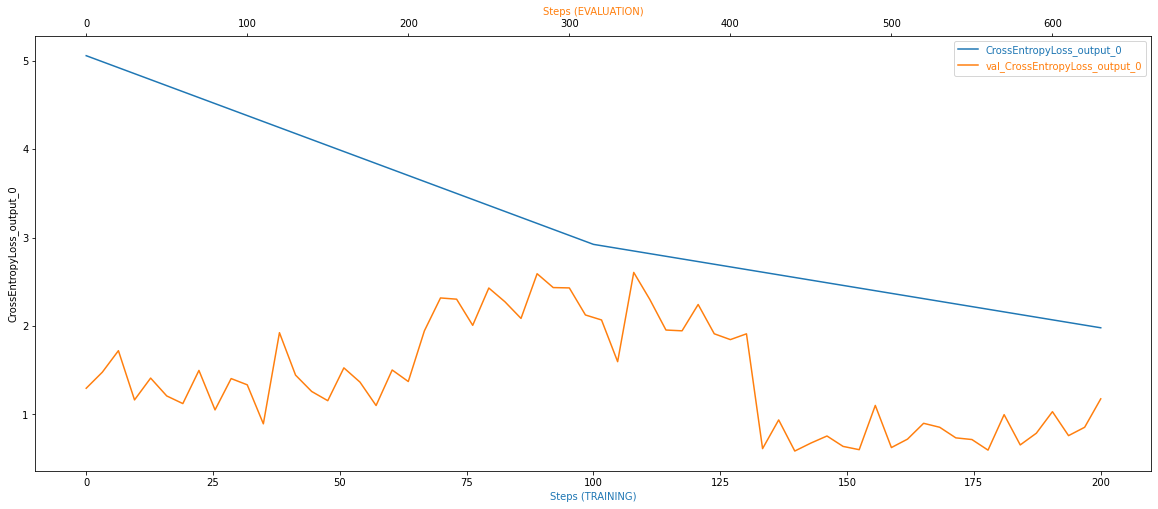

In [23]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

The cross entropy loss for training is decreasing as the number of steps increases, however, the cross entropy loss in evaluation mode seems to be fluctuating. This is anomaly as ideally, the evaluation plot should be similar to the plot for training where there is a decrease in cross entropy loss. 

It is possible that this was caused by overfitting which can be resolved by modifying hyperparameters or decreasing the number of hyperparameters used in my training. Other possible solutions include: using dropout, regularization or early stopping techniques.

In [24]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

2023-01-29 15:06:05     423268 smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-01-29 15:06:05     279710 smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-01-29 15:06:00        553 smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-01-29 15:06:00      14518 smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-01-29 15:06:00       1864 smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-01-29 15:06:00        130 smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-01-29 15:06:00       1144 smdebugger-dogImages-py

In [25]:
import os
import IPython
import shutil

profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

shutil.make_archive("./profiler_repot", "zip", "ProfilerReport")


'/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/profiler_repot.zip'

## Model Deploying

In [6]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import boto3
import sagemaker
from sagemaker.pytorch import PyTorchModel
from sagemaker import get_execution_role, Session
from sagemaker.serializers import JSONSerializer, IdentitySerializer
from sagemaker.deserializers import JSONDeserializer
import io
from PIL import Image
import torchvision.transforms as transforms

In [7]:
model_location = "s3://sagemaker-us-east-1-057024489761/smdebugger-dogImages-pytorch-2023-01-29-14-54-24-918/output/model.tar.gz"

pytorch_model = PyTorchModel(model_data=model_location, role=get_execution_role(), entry_point='inference.py', py_version='py36',
                             framework_version='1.8')

predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')

------!

In [8]:
predictor.endpoint

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'pytorch-inference-2023-02-02-07-25-40-506'

In [9]:
def predict (img_path):
    image = Image.open(img_path)
    
    img_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),])
    
    print('transforming input')
    
    t_img = img_transform(image).unsqueeze(0)
    t_img = t_img.to('cpu')
    
    response = predictor.predict(t_img)
    return response

In [10]:
r1 = predict("dogImages/test/006.American_eskimo_dog/American_eskimo_dog_00454.jpg" )

transforming input


ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2023-02-02-07-25-40-506 in account 057024489761 for more information.

In [85]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: smdebugger-dogImages-pytorch-2023-01-28-23-52-50-063
INFO:sagemaker:Deleting endpoint with name: smdebugger-dogImages-pytorch-2023-01-28-23-52-50-063
